<center>Национальный исследовательский университет ИТМО<br/>Факультет информационных технологий и программирования<br/>Прикладная математика и информатика</center>

## <center>Математическая статистика</center>
### <center>Отчёт по лабораторной работе №1</center>

<div style="text-align: right"><b>Работу выполнили:</b><br/>Белоцерковченко Андрей M3237<br/>Смирнов Андрей M3237<br/</div>

<center>Санкт-Петербург<br/>2023</center>

In [244]:
from matplotlib import pyplot as plt
from typing import List
import csv
import numpy as np
from tqdm import tqdm
from scipy.stats import norm
import scipy.stats as sts

# Задание 1

Для решения задачи выберем распределение $N(20, 1)$. Мы знаем, что $\forall p \in \mathbb{Z} > 0$ у нормального распределения существует конечный $p$-ый момент, значит выбранное распределение нам подходит. 

In [245]:
class SampleStats:
    def __init__(self, mean, scale):
        self.sample_mean = []
        self.sample_variance = []
        self.quantile = []
        self.function1 = []
        self.function2 = []
        self.mean = mean
        self.scale = scale
        
    def addMean(self, value):
        self.sample_mean.append(value)

    def addVariance(self, value):
        self.sample_variance.append(value)

    def addQuantile(self, value):
        self.quantile.append(value)

    def addFF(self, value):
        self.function1.append(value)

    def addFS(self, value):
        self.function2.append(value)
        
    def display_stat(self, c, title, stat_values, mu):
        plt.subplot(c)
        plt.hist(stat_values, bins=100, edgecolor='k', density=True)
        x = np.linspace(np.min(stat_values), np.max(stat_values), 100)
        y = norm.pdf(x, mu, np.std(stat_values))
        plt.plot(x, y, 'r', linewidth=2, label='')
        plt.title(title)
        
    def showStats(self):
        plt.figure(figsize=(10, 3))
        
        self.display_stat(132, 'Выборочное среднее', self.sample_mean, self.mean)
        self.display_stat(131, 'Выборочная дисперсия', self.sample_variance, self.scale)
        self.display_stat(133, 'Квантиль', self.quantile, self.mean)

        plt.tight_layout()
        plt.show()
        
    def display_functions(self, c, title, stat_values, a, scale):
        plt.subplot(c)
        plt.hist(np.sort(stat_values), bins=100, edgecolor='k', density=True)
        x = np.linspace(np.min(stat_values), np.max(stat_values), 100)
        pdf_values = sts.gamma.pdf(x, a=a, scale=scale)
        plt.plot(x, pdf_values, label='')
        plt.title(title)
        
    def show_functions(self):
        plt.figure(figsize=(10, 3))

        self.display_functions(121, 'Функция 1', self.function1, 2, 1)
        self.display_functions(122, 'Функция 2', self.function2, 1, 1)
        
        plt.tight_layout()
        plt.show()

In [246]:
def gen_and_process_sample(mean, std_dev, element_number, stats: SampleStats):
    data = np.random.normal(mean, std_dev, element_number)
    stats.addMean(np.mean(data))
    stats.addVariance(np.var(data))
    stats.addQuantile(np.median(data))
    
    norm_rv = sts.norm(loc=20, scale=1)
    
    sorted_data = np.sort(data)
    stats.addFF(element_number * norm_rv.cdf(sorted_data[1]))
    stats.addFS(element_number * (1 - norm_rv.cdf(sorted_data[-1])))
    

In [247]:
def process_and_show_samples(mean, std_dev, element_number, sample_number):
    stats = SampleStats(mean, std_dev)
    for _ in tqdm(range(sample_number)):
        gen_and_process_sample(mean, std_dev, element_number, stats)
    
    stats.showStats()
    stats.show_functions()

100%|██████████| 10000/10000 [00:22<00:00, 446.40it/s]


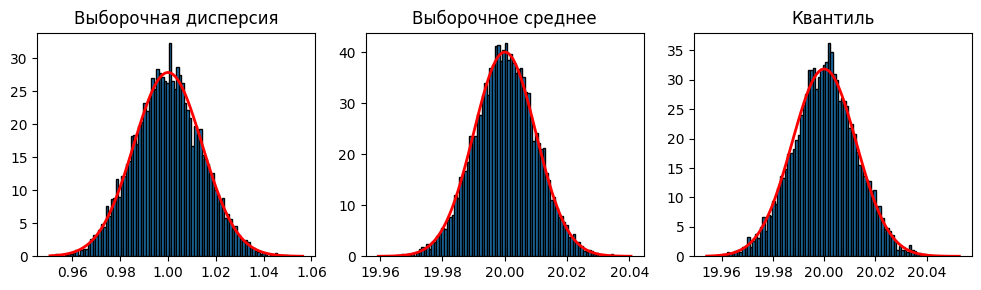

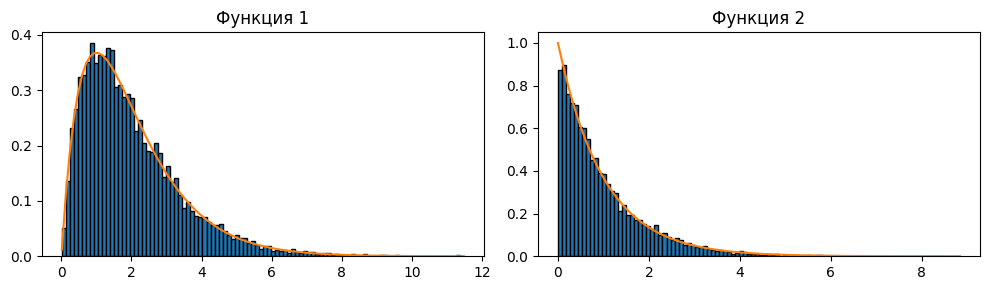

In [248]:
process_and_show_samples(20, 1, 10000, 10000)

# Задание 2.2


Количество курящих мужчин: 159
Количество некурящих женщин: 547

Данные для всех людей:
Выборочное среднее = 30.66339686098655
Выборочная дисперсия = 37.16008997478835
Выборочная медиана = 30.4
Выборочная квантиль порядка 0.6 = 32.032


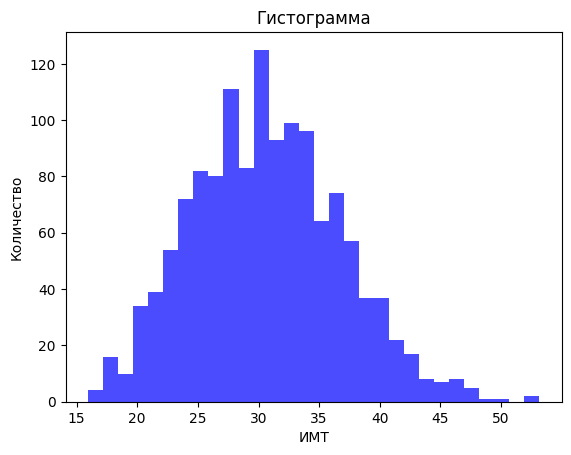

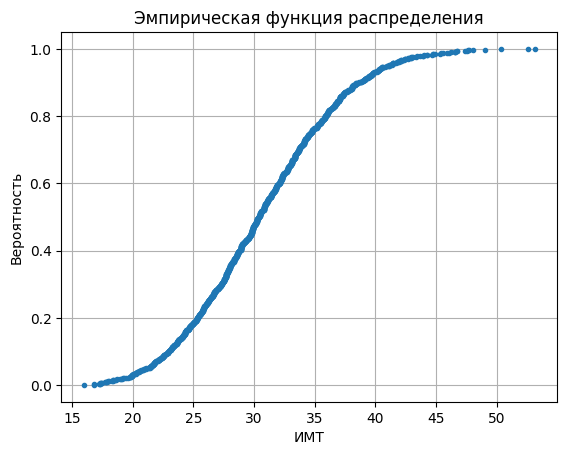

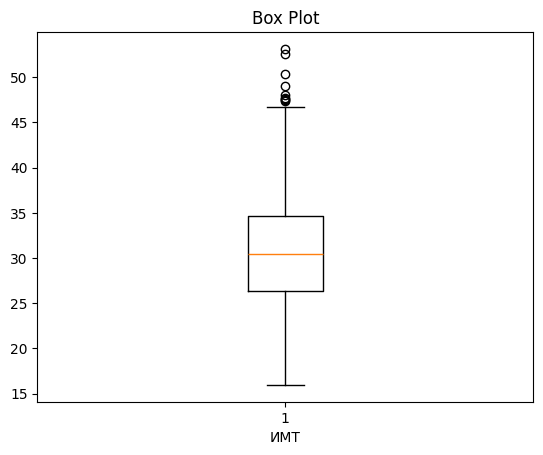

Данные для курящих женщин:
Выборочное среднее = 29.60826086956522
Выборочная дисперсия = 44.02011001890359
Выборочная медиана = 28.38
Выборочная квантиль порядка 0.6 = 30.875999999999998


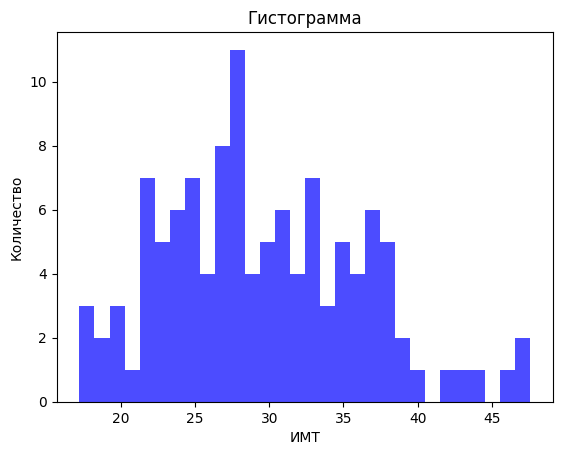

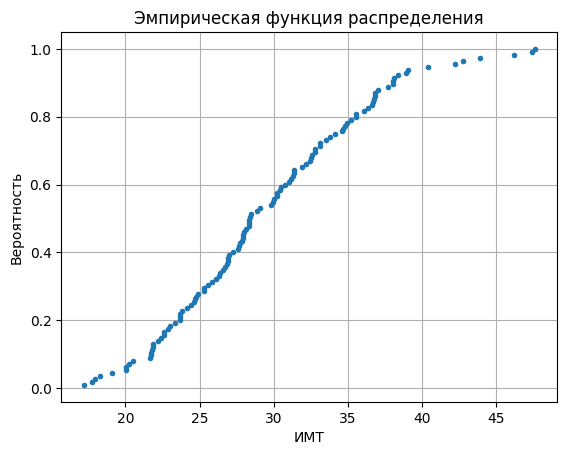

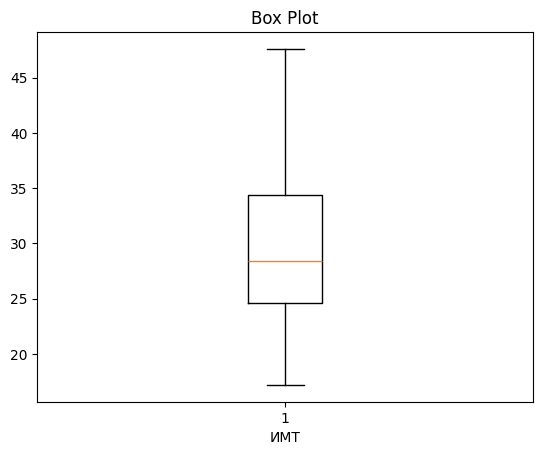

Данные для некурящих женщин:
Выборочное среднее = 30.539524680073125
Выборочная дисперсия = 34.76733807388815
Выборочная медиана = 30.21
Выборочная квантиль порядка 0.6 = 31.912


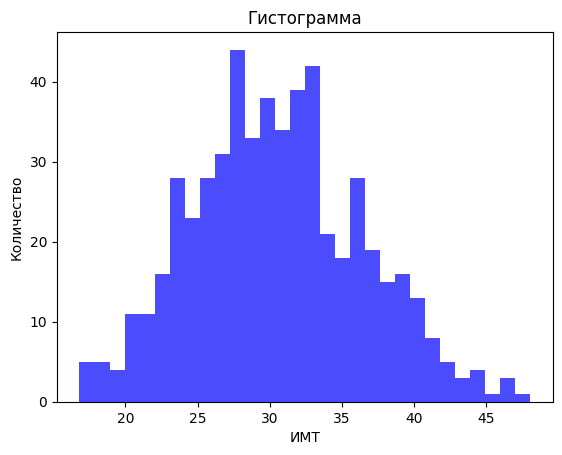

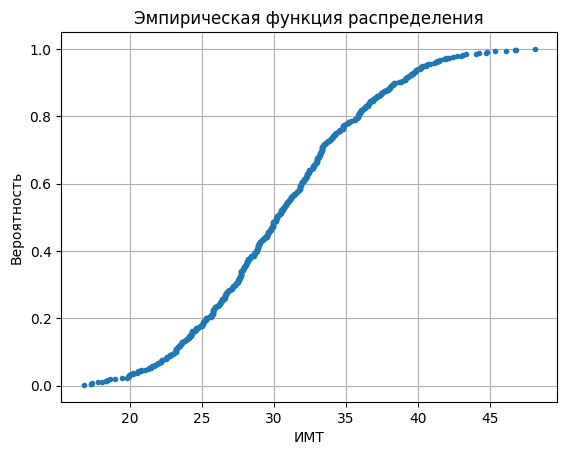

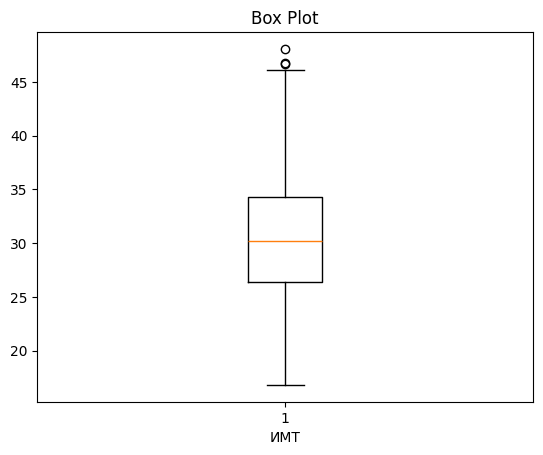

Данные для курящих мужчин:
Выборочное среднее = 31.504182389937107
Выборочная дисперсия = 35.20382857679681
Выборочная медиана = 31.13
Выборочная квантиль порядка 0.6 = 33.244


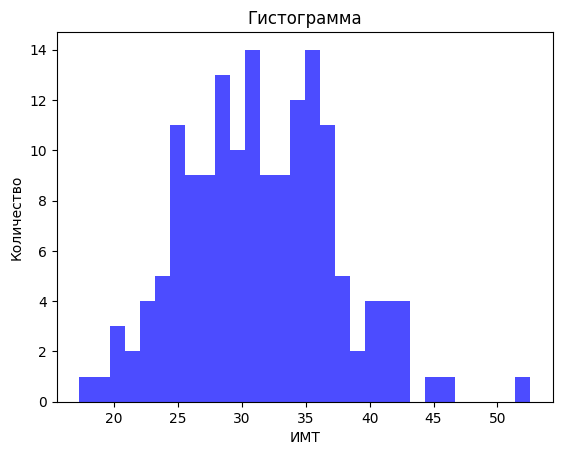

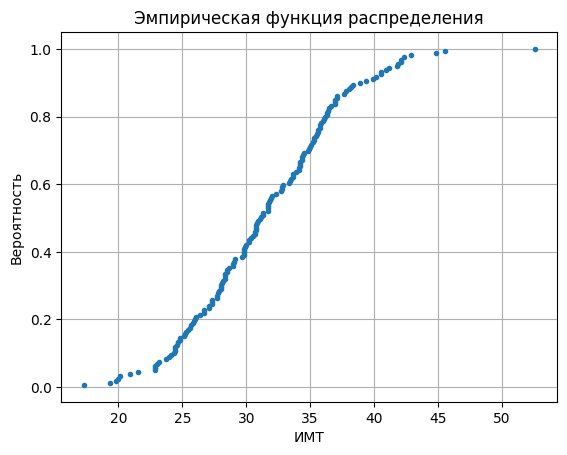

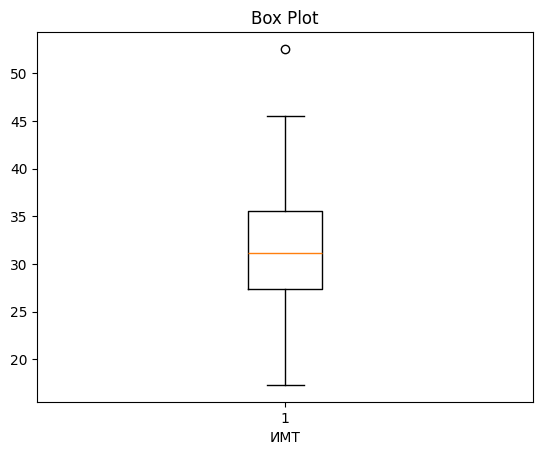

Данные для некурящих мужчин:
Выборочное среднее = 30.770580270793037
Выборочная дисперсия = 38.2746249050653
Выборочная медиана = 30.495
Выборочная квантиль порядка 0.6 = 32.11


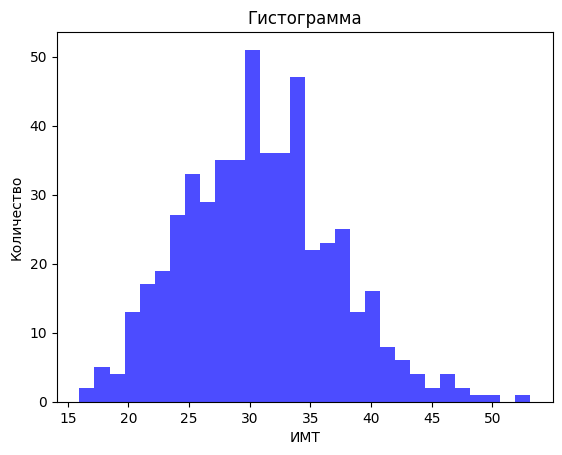

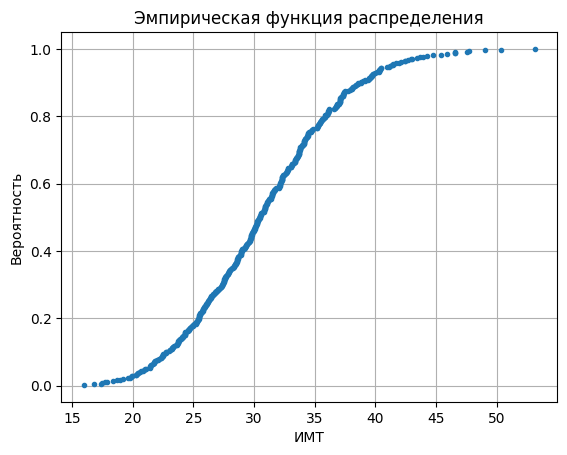

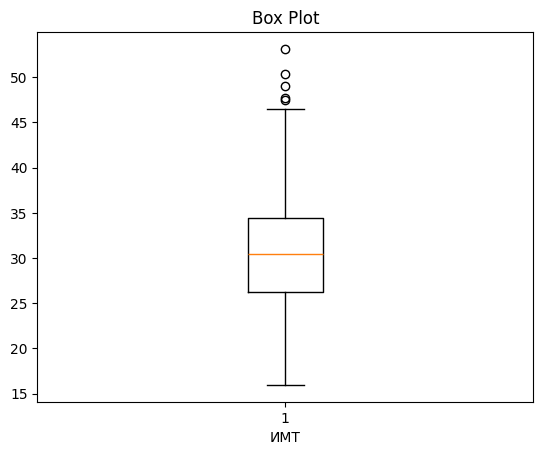

In [249]:
def calculate(data: List[float]):
    data = np.array(data)
    ex = np.mean(data)
    varx = np.var(data)
    median = np.median(data)
    
    q = 0.6
    quantile_value = np.percentile(data, q * 100)
    
    print(f"Выборочное среднее = {ex}")
    print(f"Выборочная дисперсия = {varx}")
    print(f"Выборочная медиана = {median}")
    print(f"Выборочная квантиль порядка 0.6 = {quantile_value}")
    
    plt.hist(data, bins=30, color='blue', alpha=0.7)
    
    # Добавляем заголовок и подписи к осям
    plt.title('Гистограмма')
    plt.xlabel('ИМТ')
    plt.ylabel('Количество')
    
    # Отображаем гистограмму
    plt.show()
    
    sorted_data = np.sort(data)
    
    # Вычисляем функцию распределения (кумулятивную функцию)
    cumulative_distribution = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    # Строим график функции распределения
    plt.plot(sorted_data, cumulative_distribution, marker='.', linestyle='none')
    plt.title('Эмпирическая функция распределения')
    plt.xlabel('ИМТ')
    plt.ylabel('Вероятность')
    plt.grid(True)
    
    # Отображаем график
    plt.show()
    
    plt.boxplot(data)

    # Добавляем заголовок и метку оси X
    plt.title('Box Plot')
    plt.xlabel('ИМТ')
    
    # Отображаем график
    plt.show()


with open('sex_bmi_smokers.csv', 'r') as file:
    # Create a CSV reader
    csv_reader = csv.reader(file)

    # Skip the header row if it exists
    next(csv_reader, None)

    # Read and process data
    all_data = list(csv_reader)
    
    all_people = [float(x[1]) for x in all_data]
    female_smoke = [float(x[1]) for x in all_data if x[0] == "female" and x[2] == "yes"]
    female_no_smoke = [float(x[1]) for x in all_data if x[0] == "female" and x[2] == "no"]
    male_smoke = [float(x[1]) for x in all_data if x[0] == "male" and x[2] == "yes"]
    male_no_smoke = [float(x[1]) for x in all_data if x[0] == "male" and x[2] == "no"]
    
    print(f"Количество курящих мужчин: {len(male_smoke)}")
    print(f"Количество некурящих женщин: {len(female_no_smoke)}\n")
    
    print("Данные для всех людей:")
    calculate(all_people)
    print("Данные для курящих женщин:")
    calculate(female_smoke)
    print("Данные для некурящих женщин:")
    calculate(female_no_smoke)
    print("Данные для курящих мужчин:")
    calculate(male_smoke)
    print("Данные для некурящих мужчин:")
    calculate(male_no_smoke)